In [43]:
## Setup, dependencies, inspection
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup (imported os so that it would be here if I need to adjust the commands to work later)
import matplotlib.pyplot as plt
import pandas as pd
import os

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

#(each of the following initially run in new cell to show outputs)
# Get the columns and the rows that are not null.
city_data_df.count()
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()
# Get the data types of each column.
city_data_df.dtypes
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

# Get the columns and the rows that are not null.
ride_data_df.count()
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()
# Get the data types of each column.
ride_data_df.dtypes

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


In [44]:
## Create metrics for the bubble chart for ride-sharing data
# Create the city type dataframes.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the number of rides for each city by type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the average fare for each city by type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Get the number of drivers for each city by type (I'm not sure why we use the average for this but I assume it has
# something to do with the the fact that we merged the df's to include the number of available drivers in each city
# in every ride_id record. I personally would have excised that from the dataframe and then just used the original
# city_data_df to retrieve this information. Perhaps it needs to be a measure in the df to be used with the plot?)
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

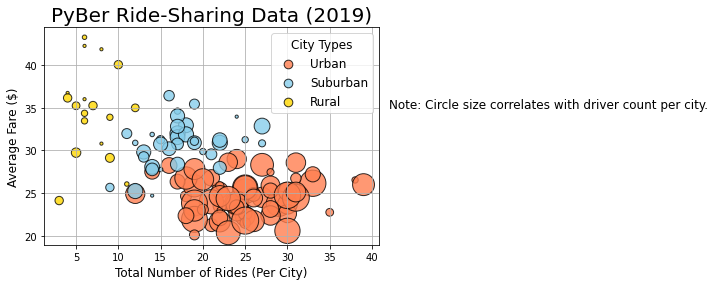

In [61]:
## Construct Bubble Chart
# Build Urban Cities
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", ec="k",
            linewidths=1,
            alpha=0.8,
           label="Urban")

# Build Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue", ec="k",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

# Build Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
            c="gold", ec="k",
            linewidths=1,
            alpha=0.8, 
            label="Rural")

# Add chart elements
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Make uniform formatting for the legend by creating a variable and adding additional parameters for text font size,
# legend display (mode), number of scatterpoints for each marker, location of the legend, and the title.
lgnd = plt.legend(fontsize="12", mode="expanded",
                 scatterpoints=1, loc="best", title="City Types")

# Use handles to set the font size of the marker in a legend to a fixed size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Increase the fontsize of the legend title to 12
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. 42 put the note to the right of the chart and 35 puts it a bit over 
# halfway up the side. Think X and Y coords
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")